In [1]:
import pandas as pd
df = pd.read_csv('data.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,2.954000e+03,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2.954000e+03,2954.000000
mean,1.520086e+09,11207.376862,11209.768883,11208.548646,11208.630034,1.453982,0.054124,1.029759e+06,0.138600
std,5.117227e+04,183.494452,183.247916,183.378074,183.378461,1.925879,0.040878,2.480080e+05,0.022233
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,-0.004737,4.487650e+05,0.059554
25%,1.520042e+09,11109.902500,11111.000000,11110.185000,11110.992500,0.294633,0.023286,8.872070e+05,0.123677
50%,1.520086e+09,11231.515000,11243.125000,11239.665000,11239.510000,0.851395,0.048726,1.025320e+06,0.138813
75%,1.520131e+09,11340.000000,11343.690000,11340.100000,11340.020000,1.877020,0.082557,1.179228e+06,0.157332
max,1.520175e+09,11492.370000,11493.750000,11493.750000,11493.740000,23.988752,0.195451,1.707796e+06,0.176271


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.481664,0.482117,0.481761,0.481878,-0.145172,-0.573416,-0.072285,0.077061
low,0.481664,1.000000,0.999496,0.999699,0.999785,-0.021527,0.128667,-0.112962,0.406838
high,0.482117,0.999496,1.000000,0.999763,0.999745,-0.009285,0.128588,-0.113254,0.406987
open,0.481761,0.999699,0.999763,1.000000,0.999539,-0.015747,0.128904,-0.113620,0.407034
close,0.481878,0.999785,0.999745,0.999539,1.000000,-0.014645,0.128645,-0.112660,0.406844
volume,-0.145172,-0.021527,-0.009285,-0.015747,-0.014645,1.000000,0.082570,0.092396,-0.055590
tw_sentiment,-0.573416,0.128667,0.128588,0.128904,0.128645,0.082570,1.000000,-0.179671,0.291776
tw_followers,-0.072285,-0.112962,-0.113254,-0.113620,-0.112660,0.092396,-0.179671,1.000000,-0.045372
reddit_sentiment,0.077061,0.406838,0.406987,0.407034,0.406844,-0.055590,0.291776,-0.045372,1.000000


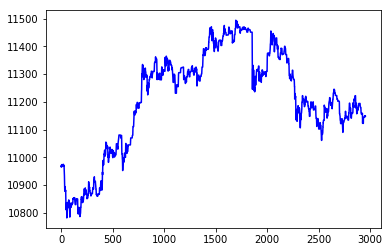

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['close'], 'b')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']]
y = df['close'].values.reshape(-1, 1)

In [7]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, shuffle=False)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(2067, 1, 4)

In [10]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=400, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 485,001
Trainable params: 485,001
Non-trainable params: 0
_________________________________________________________________


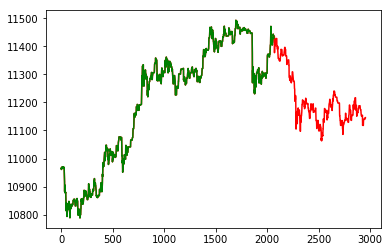

In [11]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [12]:
import time
from enum import Enum

class Order(Enum):
    STAY = 1
    DOWN = 2
    UP = 3

n_error = 0
y_predict_last = y_last = None
for index, row in df.iterrows():
    if y_predict_last is None:
        y_predict_last = y_last = row['open']
        
    x_predict = np.array([row['open'], row['reddit_sentiment'], row['tw_sentiment'], row['tw_followers']]).reshape(1, -1)
    x_predict = scalerX.transform(x_predict)
    x_predict_reshaped = np.reshape(x_predict, (1, 1, 4))
    y_predict_r = model.predict(x_predict_reshaped)
    y_predict_r_rescaled = scalerY.inverse_transform(y_predict_r)

    predict_order = real_order = Order.DOWN
    if y_predict_last < y_predict_r_rescaled:
        predict_order = Order.UP
    elif y_predict_last == y_predict_r_rescaled:
        predict_order = Order.STAY

    if y_last < row['open']:
        real_order = Order.UP
    elif y_last == row['open']:
        real_order = Order.STAY
    
    y_predict_last = y_predict_r_rescaled
    y_last = row['open']
    
    if real_order != predict_order:
        #print('predicted %s, real %s'% (predict_order, real_order))
        n_error = n_error + 1
        
count = df['open'].count()
percent = (n_error / count) * 100
print("Error Order percentage: %0.2f%%" % percent)

Error Order percentage: 6.50%
